#### IOU 
1. IOU(Intersection Over Union)
    * Object detection의 성능평가(Metric) 
    * Model이 예측한 결과(Predicted)와 실측(Ground Truth)Bounding box가 얼마나 정확하게 겹치는가를 나타내는 지표이다. 
$$ IOU  = \frac{\text{Area of OverRap}}{\text{Area of Union}}$$
$$ IOU =\frac{\text{개별 box가 겹치는 영역}}{\text{전체 box의 합집합 영역}}$$ 

2. IOU에 따른 성능 
    * IoU = 0.403 Poor 
    * IoU = 0.740 Good 
    * IoU = 0.936 Excellent 
 

In [ ]:
!pip install selectivesearch 

In [6]:
import selectivesearch
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2

In [3]:
from google.colab import drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


In [7]:
def get_show_image(image):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    plt.axis("on")
    plt.show()

def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape {images[i].shape}")

In [8]:
FILE_PATH = "drive/MyDrive/dataset/image/"
image = cv2.cvtColor(cv2.imread(FILE_PATH + "audrey01.jpg"), cv2.COLOR_BGR2RGB)

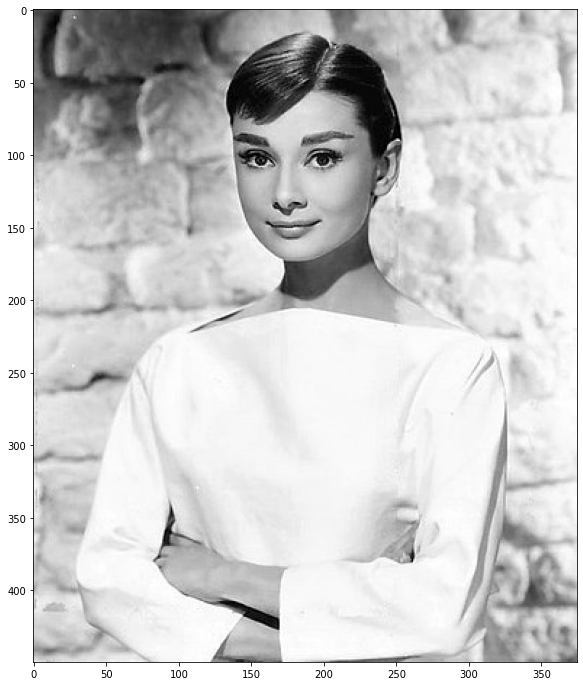

shape (450, 375, 3)


In [ ]:
get_show_image(image)
get_show_shape([image])

In [18]:
# Groundtruth  box 
# candidate box
def get_compute_iou(can_box, gt_box):
    x1 = np.maximum(can_box[0], gt_box[0])
    y1 = np.maximum(can_box[1], gt_box[1])
    x2 = np.minimum(can_box[2], gt_box[2])
    y2 = np.minimum(can_box[3], gt_box[3])

    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

    can_box_area = (can_box[2] - can_box[0]) * (can_box[3] - can_box[1])
    gt_box_area =  (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])

    union = can_box_area + gt_box_area - intersection 

    iou = intersection / union 

    return iou 

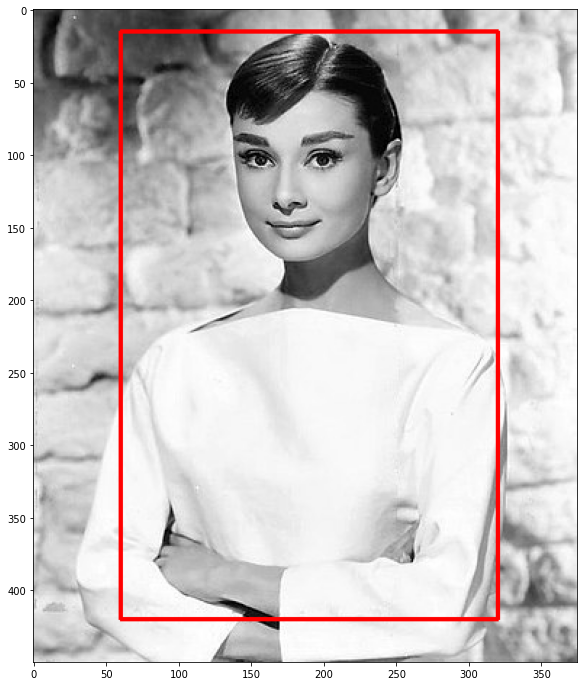

In [10]:
gt_box = [60, 15, 320, 420]

red = (255, 0, 0)
image_copy = image.copy()
image_copy = cv2.rectangle(image_copy, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

get_show_image(image_copy)

In [ ]:
_, region = selectivesearch.selective_search(image, scale=100, min_size=2000)
candidate_rect = [keys["rect"] for keys in region]
candidate_rect.sort()
print(len(region))
 
for i, can_box in enumerate(candidate_rect):
    can_box = list(can_box)
    print(f"x min{can_box[0]} y min {can_box[1]} w {can_box[2]} h {can_box[3]}")
    can_box[2] += can_box[0]
    can_box[3] += can_box[1]

    iou = get_compute_iou(can_box, gt_box)
    print(f"index : {i} can_box: {can_box} iou : {iou}")


In [ ]:
candidate_rect2 = [keys["rect"] for keys in region if keys["size"]>3000]
candidate_rect2.sort()
green_color = (155, 255, 51) 
red_color = (255, 0, 0) 
print(len(candidate_rect2))
image = cv2.rectangle(image, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red_color, thickness=2)

for i, can_box in enumerate(candidate_rect2):
    can_box = list(can_box)
    can_box[2] += can_box[0]
    can_box[3] += can_box[1]

    iou = get_compute_iou(can_box, gt_box)
    if iou > 0.5: 
        print(f"index : {i} can_box: {can_box} iou : {iou}")
        cv2.rectangle(image, (can_box[0], can_box[1]), (can_box[2], can_box[3]), color=green_color, thickness=1)
        text = "{}: {:.2f}".format(i, iou)
        text = "1"
        
        cv2.putText(image, text, (can_box[0]+ 100, can_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red_color, thickness=1)
    

plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.show()

In [46]:
def get_show_box_bounding(image, rects_value):
    
    green_box = (155, 255, 51)   
    image_copy = image.copy()
    
    for rect in rects_value:
        left=rect[0]
        top= rect[1]
        right = left + rect[2]
        bottom = top + rect[3]

        image_copy = cv2.rectangle(image_copy, (left, top), (right, bottom), color=green_box, thickness=2)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_copy)
    plt.show()

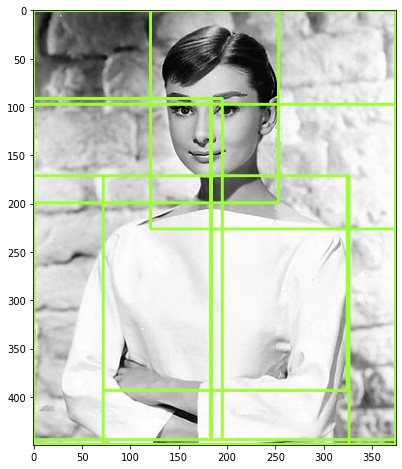

In [51]:
get_show_box_bounding(image, candidate_rect2)